In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
# Step 2: Load the Dataset
url = '/content/winequality-red[1].csv'
data = pd.read_csv(url, sep=';')
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [4]:
# Step 3: Explore Dataset
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nClass Distribution:")
print(data['quality'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual su

In [5]:
# Step 4: Convert Multiclass to Binary Classification
# Label quality >= 7 as 1 (good), else 0 (bad)
data['quality'] = data['quality'].apply(lambda q: 1 if q >= 7 else 0)
print("\nUpdated Class Distribution:")
print(data['quality'].value_counts())


Updated Class Distribution:
quality
0    1382
1     217
Name: count, dtype: int64


In [6]:
# Step 5: Split Features and Target
X = data.drop('quality', axis=1)
y = data['quality']

In [7]:
# Step 6: Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 8: Define and Initialize Models
# Fixing the syntax error by ensuring a complete dictionary entry
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [11]:
# Step 9: Train and Evaluate Each Model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)


Training Logistic Regression...
Accuracy: 0.8656
Confusion Matrix:
[[264   9]
 [ 34  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320


Training Decision Tree...
Accuracy: 0.8812
Confusion Matrix:
[[256  17]
 [ 21  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       273
           1       0.60      0.55      0.58        47

    accuracy                           0.88       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320


Training Random Forest...
Accuracy: 0.8969
Confusion Matrix:
[[263  10]
 [ 23  24]]
Classification Report:
              pr

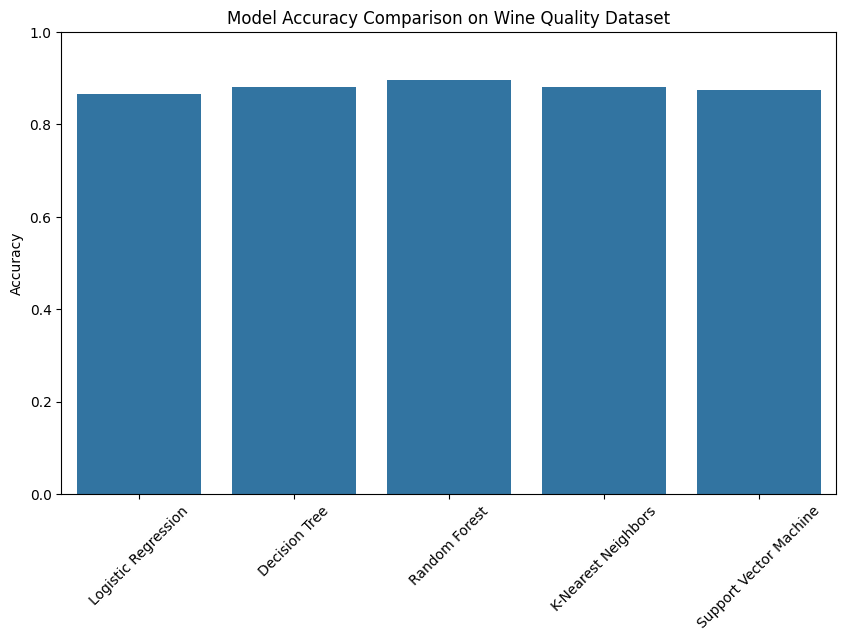

In [12]:
# Step 10: Visualize Model Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison on Wine Quality Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()